In [49]:
import numpy as np
import pandas as pd 


In [50]:
data=pd.read_csv('/content/drive/MyDrive/Data for data analysis/SMSSpamCollection .csv', sep='\t')
data

,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
0,ham,Ok lar... Joking wif u oni...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,U dun say so early hor... U c already then say...
3,ham,"Nah I don't think he goes to usf, he lives aro..."
4,spam,FreeMsg Hey there darling it's been 3 week's n...
...,...,...
5566,spam,This is the 2nd time we have tried 2 contact u...
5567,ham,Will ü b going to esplanade fr home?
5568,ham,"Pity, * was in mood for that. So...any other s..."
5569,ham,The guy did some bitching but I acted like i'd...


In [51]:
#change columns name

data.columns=['label','body_text']
data.head()

,label,body_text
0,ham,Ok lar... Joking wif u oni...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,U dun say so early hor... U c already then say...
3,ham,"Nah I don't think he goes to usf, he lives aro..."
4,spam,FreeMsg Hey there darling it's been 3 week's n...


**exploring dataset**

In [52]:
data.shape

(5571, 2)

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5571 entries, 0 to 5570
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   label      5571 non-null   object
 1   body_text  5571 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [54]:
# generate desprictive statistics
data.describe()

,label,body_text
count,5571,5571
unique,2,5168
top,ham,"Sorry, I'll call later"
freq,4824,30


In [7]:
#how many rows spam and ham

data.label.value_counts()

ham     4824
spam     747
Name: label, dtype: int64

In [8]:
data.label.value_counts(normalize=True)

ham     0.865913
spam    0.134087
Name: label, dtype: float64

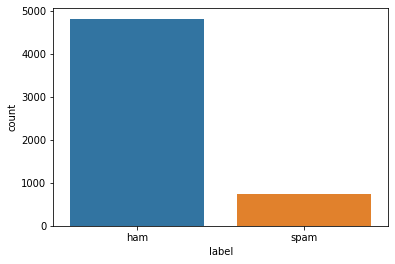

In [55]:
#visualize spam and ham values 

import seaborn as sns 
sns.countplot(x=data['label'])

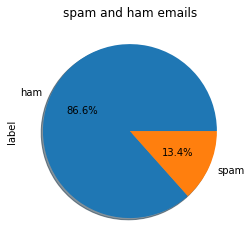

In [56]:
#pie chart
import matplotlib.pyplot as plt
data.label.value_counts(normalize=True).plot.pie( autopct='%1.1f%%', shadow=True)
plt.title('spam and ham emails')
plt.show()

In [57]:
#chack nulls values
data.isnull().value_counts()

label  body_text
False  False        5571
dtype: int64

**preprocessing text data**



*  1- remove punctuation
 



In [58]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [59]:
#list comprhansion 
#lambda function

def remove_puncet(text):
  text_nopunct=''.join([char for char in text if char not in string.punctuation])
  return text_nopunct

#add new column 
data['body_text_nopunc']=data['body_text'].apply(lambda x:remove_puncet(x))

data.head()


,label,body_text,body_text_nopunc
0,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say
3,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...
4,spam,FreeMsg Hey there darling it's been 3 week's n...,FreeMsg Hey there darling its been 3 weeks now...


In [60]:
#apply lower case


def remove_puncet(text):
  text_nopunct=''.join([char for char in text if char not in string.punctuation])
  return text_nopunct

#add new column 
data['body_text_nopunc']=data['body_text'].apply(lambda x:remove_puncet(x.lower()))

data.head()

,label,body_text,body_text_nopunc
0,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...
2,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
3,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...
4,spam,FreeMsg Hey there darling it's been 3 week's n...,freemsg hey there darling its been 3 weeks now...







*  2- tokenization












*   we split sentencse into individual words each of these called tokens


*   This is important because the meaning of the text could easily be interpreted by analyzing the words present in the text. The final Goal of Tokenization is : Creating Vocabulary




** methods to perform tokenization in python**


*   Tokenization using Python’s split() function

*  Tokenization using Regular Expressions (RegEx)
*   Tokenization using NLTK library


*  Tokenization using the other libraries like spaCy and Gensim library





In [61]:
s=data['body_text_nopunc'][1]
s

'free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry questionstd txt ratetcs apply 08452810075over18s'

In [62]:
from nltk.tokenize import word_tokenize

In [63]:
import nltk

In [64]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [65]:
def tokenize(text):
    tokens = word_tokenize(text)
    return tokens
data['body_text_tokenized'] = data['body_text_nopunc'].apply(lambda x: tokenize(x))

data.head()

,label,body_text,body_text_nopunc,body_text_tokenized
0,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]"
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
2,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, t..."
3,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l..."
4,spam,FreeMsg Hey there darling it's been 3 week's n...,freemsg hey there darling its been 3 weeks now...,"[freemsg, hey, there, darling, its, been, 3, w..."


**3- remove stop words**




* stopwords are common words that are present in the text but generally do not contribute to the meaning of a sentence.

*   They hold almost no importance for the purposes of information retrieval and natural language processing. They can safely be ignored without sacrificing the meaning of the sentence. For example – ‘the’ and ‘a
* The NLTK package has a separate package of stop words that can be downloaded. NLTK has stop words more than 16 languages which can be downloaded and used.





 



In [66]:
from nltk.corpus import stopwords

In [67]:
nltk.download ('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [68]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [69]:
def remove_stopwords(tokenized_list):
  text=[word for word in tokenized_list if word not in stopwords.words('english')]
  return text
  

In [72]:
data['dody_text_nostop']=data['body_text_tokenized'].apply(lambda x:remove_stopwords(x))
data.head()

,label,body_text,body_text_nopunc,body_text_tokenized,dody_text_nostop
0,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
2,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]"
3,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t..."
4,spam,FreeMsg Hey there darling it's been 3 week's n...,freemsg hey there darling its been 3 weeks now...,"[freemsg, hey, there, darling, its, been, 3, w...","[freemsg, hey, darling, 3, weeks, word, back, ..."


**4- using stemming**



*   Stemming.  Is the process of reducing inflected or derived words to their word stem or root. 
*   it is aiming to reduce variations of the same root word.



In [73]:
from nltk.stem import PorterStemmer

ps= PorterStemmer()

In [74]:
def stemming(tokenized_text):
  text=[ps.stem(word)for word in tokenized_text ]
  return text

In [75]:
data['body_text_stemmed']=data['dody_text_nostop']
data.head()

,label,body_text,body_text_nopunc,body_text_tokenized,dody_text_nostop,body_text_stemmed
0,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
2,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, early, hor, u, c, already, say]"
3,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goes, usf, lives, around, t..."
4,spam,FreeMsg Hey there darling it's been 3 week's n...,freemsg hey there darling its been 3 weeks now...,"[freemsg, hey, there, darling, its, been, 3, w...","[freemsg, hey, darling, 3, weeks, word, back, ...","[freemsg, hey, darling, 3, weeks, word, back, ..."


**5- using limmtization**



*   Lemmatization, unlike Stemming, reduces the inflected words properly ensuring that the root word belongs to the language lemmatizing is using vocabulary analysis of words to remove inflectional endings and return to the dictionary form of a word.  So again : play, playing, played and plays  would all be simplified down to play, because that's the root of the word. 

  **difference between limitization and stemming**


*   stemming using algorithm without any understanding of the context in which a word is used
it is not accurate as it is not understanding the text

 ,but it is faster as the rules are quite simple

*  limmtization using dectionary so it is accurate ,but slower 




In [76]:

nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [77]:
wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()

In [78]:
def lemmatizing(tokenized_text):
  text=[wn.lemmatize(word) for word in tokenized_text]
  return text

In [79]:
data['body_text_lemmatized']=data['dody_text_nostop']
data.head()

,label,body_text,body_text_nopunc,body_text_tokenized,dody_text_nostop,body_text_stemmed,body_text_lemmatized
0,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
2,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, early, hor, u, c, already, say]"
3,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goes, usf, lives, around, t..."
4,spam,FreeMsg Hey there darling it's been 3 week's n...,freemsg hey there darling its been 3 weeks now...,"[freemsg, hey, there, darling, its, been, 3, w...","[freemsg, hey, darling, 3, weeks, word, back, ...","[freemsg, hey, darling, 3, weeks, word, back, ...","[freemsg, hey, darling, 3, weeks, word, back, ..."


**Create function to remove punctuation, tokenize, remove stopwords, and stem**

In [80]:
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
     #tokens = re.split('\W+', text)
    tokens = word_tokenize(text)
    text = " ".join([ps.stem(word) for word in tokens if word not in stopwords.words('english')])
    return text
data=data[['label','body_text']]
data['cleaned_text'] = data['body_text'].apply(lambda x: clean_text(x))

<ipython-input-80-cbe8cb87e1b1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cleaned_text'] = data['body_text'].apply(lambda x: clean_text(x))


In [81]:
data.shape

(5571, 3)

In [82]:
data.head()

,label,body_text,cleaned_text
0,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
2,ham,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
3,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think goe usf live around though
4,spam,FreeMsg Hey there darling it's been 3 week's n...,freemsg hey darl 3 week word back id like fun ...


**6- vectorization**




*   Vectorizing : The process that we use to convert text to a form that Python and a machine learning model can understand,will Creates a document-term matrix where the entry of each cell will be a count of the number of times that word occurred in that document.





In [83]:
from sklearn.feature_extraction.text import CountVectorizer

cv=CountVectorizer()
cv.fit_transform(data['cleaned_text'])

<5571x8090 sparse matrix of type '<class 'numpy.int64'>'
	with 47267 stored elements in Compressed Sparse Row format>

In [84]:
features_cv=cv.fit_transform(data['cleaned_text'])

print(features_cv.shape)

(5571, 8090)


In [85]:
print('Spare Matrix : :\n'),features_cv


Spare Matrix : :



(None, <5571x8090 sparse matrix of type '<class 'numpy.int64'>'
 	with 47267 stored elements in Compressed Sparse Row format>)

In [86]:
features_cv = pd.DataFrame(features_cv.toarray( ))
features_cv.columns = cv.get_feature_names()
features_cv

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,008704050406,0089mi,0121,01223585236,01223585334,0125698789,02,020603,0207,02070836089,...,zero,zhong,zindgi,zoe,zogtoriu,zoom,zouk,zyada,üll,〨ud
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5566,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**splitting data**

In [87]:
y=data['label']
x=features_cv

In [88]:
x.head()

,008704050406,0089mi,0121,01223585236,01223585334,0125698789,02,020603,0207,02070836089,...,zero,zhong,zindgi,zoe,zogtoriu,zoom,zouk,zyada,üll,〨ud
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [90]:
y.head()

0     ham
1    spam
2     ham
3     ham
4    spam
Name: label, dtype: object

**building model**

In [91]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=.7)

In [ ]:
x_train.shape

In [ ]:
x_train.head()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_jobs=-1)

In [93]:
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.9706937799043063

**randomforestclassifier throw cross-validation**

In [94]:
from sklearn.model_selection import KFold,cross_val_score

rf=RandomForestClassifier(n_jobs=-1)


In [95]:
k_fold=KFold(n_splits=5)
cross_val_score(rf,x,y,cv=k_fold,scoring='accuracy'  ,n_jobs=-1)

array([0.97668161, 0.97755835, 0.97037702, 0.96499102, 0.96947935])

**accuracy and confusion matrix**

*   classification acccuracy is the ratio between correct predictions to total predictions made
*   it is a great place to start ,but often encounters problems in practice 



In [100]:
rf.fit(x_train,y_train)
accuracy=round(rf.score(x_test,y_test),3)

In [101]:
accuracy

0.973

**confusion matrix **




In [102]:
from sklearn.metrics import confusion_matrix
y_predict=rf.predict(x_test)

cm=confusion_matrix(y_test,y_predict)

In [103]:
cm

array([[1429,    0],
       [  45,  198]])

In [119]:
tp=cm[1,1]  #true positive actually spam
tp

198

In [121]:
tn=cm[0,0]  #true negative  actually ham 
tn

1429

In [122]:
fp=cm[0,1] #false positive 
fp

0

In [123]:
fn=cm[1,0]  #false negative
fn

45

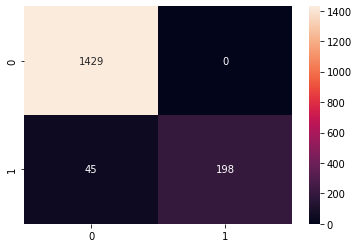

In [127]:
import seaborn as sns

sns.heatmap(cm,annot=True ,fmt='d')
plt.show()

In [128]:
print('actual spam sms:' ,tp+fn)

actual spam sms: 243


In [129]:
print('actual Ham smss :' ,tn+fp)

actual Ham smss : 1429


In [130]:
print('predicted smss as a spam :' ,tp+fp)

predicted smss as a spam : 198


In [131]:
print('predicted smss as a Ham :' ,fn+tn)

predicted smss as a Ham : 1474
